<a href="https://colab.research.google.com/github/BrunoTrinitario/IA2024-TP/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math as ma
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.initializers import glorot_uniform
from keras.layers import Dense, LSTM, Dropout, TimeDistributed, Activation, Input, concatenate
import datetime as dt
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import optimizers
from keras.callbacks import History

In [2]:
def generateData(data_path):
  df=pd.read_csv(data_path)
  anios = df.iloc[:, 0].tolist()
  temperaturas = df.iloc[:, 1].tolist()
  data=df.iloc[:, 2:]
  temperaturas=np.array(temperaturas)
  data=np.array(data)
  return anios,temperaturas,data

def normData(data):
  min=np.min(data)
  max=np.max(data)
  return (data-min)/(max-min)


In [3]:
def modelo(data):
  model = Sequential()
  model.add(LSTM(128, return_sequences= True, input_shape=(10, data.shape[2])))
  model.add(Dropout(0.2))
  model.add(LSTM(128, return_sequences= False))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation= 'linear'))
  model.compile(optimizer=optimizers.Adam(), loss='mse')
  return model

In [4]:
def entrenar_modelo(model,epocas,x,y,testx=0,testy=0):
  scores=list()
  histories=list()
  history=model.fit(x, y, epochs=epocas, batch_size=32, verbose=1)
  #_, acc = model.evaluate(testx, testy, verbose=1)
  #print('> %.3f' % (acc * 100.0))
  #scores.append(acc)
  #histories.append(history)
  #return scores, histories, model

In [5]:
def graphYVT(x,y,type):
  plt.plot(x, y, label=type, color=np.random.rand(3,), linestyle='-', linewidth=2)
  plt.title('Anio VS. Temp')
  plt.xlabel('Anio')
  plt.legend()
  plt.ylabel('Temperatura')



In [6]:
anios,temperaturas,trainData=generateData('./trainData.csv')
trainData=normData(trainData)
trainData=np.expand_dims(trainData,axis=1)
model=modelo(trainData)
entrenar_modelo(model,80,trainData,temperaturas,testx=0,testy=0)
##esto del preducit esta mal, tenemos que usar una secuencia de un anio especifico para predecir la que sigue
##https://chatgpt.com/c/67452d60-9a14-8004-9adf-85575afb697d

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 491.0328
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 491.4037  
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 478.5590 
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 469.4103 
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 448.4586 
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 418.3629  
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 363.4261 
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 293.8775  
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 216.9384 
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 142.0764 
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87.9160
Epoch 12/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.7142 
Epoch 13/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.8909 
Epoch 14/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.8044 
Epoch 15/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.4180 
Epoch 16/80
7/7 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


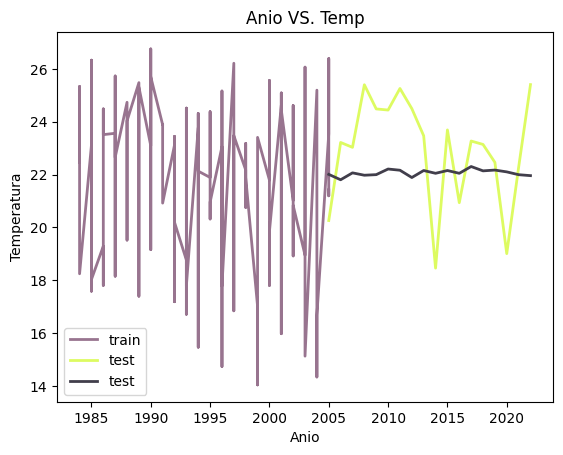

2.1939864631756927


In [ ]:
aux1,testTarget,testData=generateData('./testData.csv')
testData=normData(testData)
testData=np.expand_dims(testData,axis=1)
prediccion= model.predict(testData)
graphYVT(anios,temperaturas,'train')
graphYVT(aux1,testTarget,'test')
graphYVT(aux1,prediccion,'predicction')
plt.show()
rmse = np.sqrt(np.mean((prediccion - testTarget)**2))
print(rmse)